# Tennis Game

## Data Analyzing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
GameInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/GameInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayScoreInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchAwayScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchAwayTeamInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchAwayTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchEventInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchEventInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeScoreInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchHomeScoreInfo.csv").drop(columns=["Unnamed: 0"])
MatchHomeTeamInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchHomeTeamInfo.csv").drop(columns=["Unnamed: 0"])
MatchRoundInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchRoundInfo.csv").drop(columns=["Unnamed: 0"])
MatchTimeInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchTimeInfo.csv").drop(columns=["Unnamed: 0"])
MatchSeasonInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchSeasonInfo.csv").drop(columns=["Unnamed: 0"])
MatchTournamentInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchTournamentInfo.csv").drop(columns=["Unnamed: 0"])
MatchVenueInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchVenueInfo.csv").drop(columns=["Unnamed: 0"])
MatchVotesInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/MatchVotesInfo.csv").drop(columns=["Unnamed: 0"])
OddsInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/OddsInfo.csv").drop(columns=["Unnamed: 0"])
PeriodInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/PeriodInfo.csv").drop(columns=["Unnamed: 0"])
PowerInfo = pd.read_csv("/Users/mahlagha/TennisGame/data/processed/PowerInfo.csv").drop(columns=["Unnamed: 0"])

### 1. How many tennis players are included in the dataset?

#### Solution 1: Using Player ID

In [49]:
player_id = pd.concat([MatchAwayTeamInfo["player_id"], MatchHomeTeamInfo["player_id"]])
player_num = player_id.unique().size
print(f'The Total number of teniss players is {player_num}')

The Total number of teniss players is 2352


#### Solution 2: Using Player full name

In [50]:
player_full_name = pd.concat([MatchAwayTeamInfo["full_name"], MatchHomeTeamInfo["full_name"]])
player_num = player_full_name.unique().size
print(f'The Total number of teniss players is {player_num}')

The Total number of teniss players is 2353


### 2.  What is the average height of the players?


Step1: concating "MatchAwayTeamInfo" and "MatchHomeTeamInfo" tables

In [51]:
player_info = pd.concat([MatchAwayTeamInfo[["player_id", "height"]]
                        , MatchHomeTeamInfo[["player_id", "height"]]])
player_info.head()

,player_id,height
0,370698,NaN
1,98607,1.85
2,371052,NaN
3,124930,1.85
4,192346,NaN


Step 2: Find nan values for unique player id 

In [52]:
player_id = player_info["player_id"].unique()
player_id_nan_notna=[]
for i in range(player_id.size):
    nullcount = player_info[player_info["player_id"]==player_id[i]]["height"].isna().sum()
    notnullcount = player_info[player_info["player_id"]==player_id[i]]["height"].notna().sum()
    if nullcount != 0:
        if notnullcount !=0:
            player_id_nan_notna.append(i)
player_id_nan_notna = pd.Series(player_id_nan_notna)
player_id_nan_notna

0      36
1     217
2     878
3    1452
4    1684
5    1985
6    2321
dtype: int64

Step 3: fill nan with proper values

In [53]:
for i in player_id_nan_notna:
    player_info[player_info["player_id"]==player_id[i]] = (player_info[player_info["player_id"]==player_id[i]]
                                                           .sort_values("height").ffill())

Step 4: fill other nan values with mode and calculate total mean

In [54]:
cleaned_player_info = player_info.drop_duplicates(subset=['player_id'])
height_mode = float(cleaned_player_info['height'].mode().iloc[0])
cleaned_player_info = cleaned_player_info.fillna(value = height_mode)
height_mean = cleaned_player_info['height'].mean().round(3)
print(f'The Average height of players is: {height_mean}')

The Average height of players is: 1.825


### 3.  Which player has the highest number of wins?


Step 1: Merging required tables

In [55]:
merged_home = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home'])
merged_away = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away'])

# Ignore null values
home_wins = merged_home[merged_home['winner_code'] == 1][['player_id', 'name']].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['player_id', 'name']].copy()

# Concating home and away team wins
all_wins = pd.concat([home_wins, away_wins])
all_wins.head()

,player_id,name
0,271389,Navone M.
1,271389,Navone M.
2,78431,Lodikova D.
3,78431,Lodikova D.
4,254282,Riera J.


In [56]:
win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']
player_names = all_wins[['player_id', 'name']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')
top_player = win_counts.loc[win_counts['wins'].idxmax()]
print("Player with the highest number of wins is", top_player['name'], 'with', top_player['wins'] , 'wins')

Player with the highest number of wins is Uchijima M. with 75 wins


### 4.  What is the longest match recorded in terms of duration?


Solution 1: Group by 

In [57]:
timestamp_table = MatchTimeInfo.groupby(by="match_id").sum().drop(columns=['current_period_start_timestamp']).sum(axis=1).sort_values(ascending=False)
timestamp_table.idxmax()
timestamp_table[timestamp_table.idxmax()]
print(f'Longest match recorded is for {timestamp_table.idxmax()} match_id during {timestamp_table[timestamp_table.idxmax()]}')

Longest match recorded is for 12346747 match_id during 513458.0


Solution 2: Pivote_table

In [58]:
timestamp = pd.pivot_table(data=MatchTimeInfo, values=['period_1', 'period_2', 'period_3', 'period_4', 'period_4'], aggfunc='sum', index='match_id')
timestamp.sum(axis=1).sort_values(ascending=False)
print(f'Longest match recorded is for {timestamp_table.idxmax()} match_id during {timestamp_table[timestamp_table.idxmax()]}')

Longest match recorded is for 12346747 match_id during 513458.0


### 5.	How many sets are typically played in a tennis match?

,count,percentage
set_id,,
2,4518,69.65
3,1920,29.60
4,29,0.45
5,20,0.31


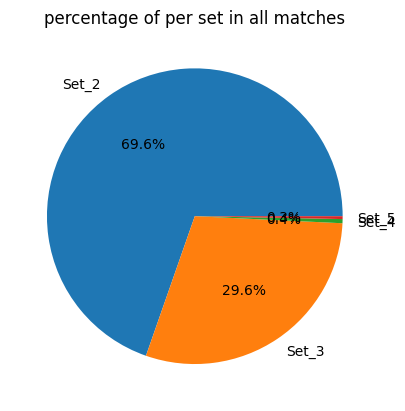

In [59]:
count_set_per_match = GameInfo.groupby('match_id')['set_id'].max().sort_values(ascending=False)
count_set_df = pd.DataFrame(count_set_per_match[count_set_per_match.values > 1].value_counts())
count_set_df['count'].sum()
count_set_df['percentage'] = ((count_set_df / count_set_df['count'].sum())*100).round(2)
display(count_set_df)
labels = ['Set_2', 'Set_3', 'Set_4', 'Set_5']
data = count_set_df['percentage']
plt.pie(x=data, labels=labels, autopct = '%1.1f%%')
plt.title ('percentage of per set in all matches')
plt.show()

### 6.	Which country has produced the most successful tennis players?

In [60]:
home_wins = merged_home[merged_home['winner_code'] == 1][['player_id', 'name', 'country']].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['player_id', 'name', 'country']].copy()

all_wins = pd.concat([home_wins, away_wins])

win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

player_names = all_wins[['player_id', 'name', 'country']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

win_country = win_counts.groupby(['country']).count()['wins'].sort_values(ascending=False)
print(f'Most of wins belong to {win_country.idxmax()}')

Most of wins belong to USA


### 7.  What is the average number of aces per match?


In [61]:
aces_info = PeriodInfo[(PeriodInfo['statistic_name'] == 'aces') & (PeriodInfo['period'] == 'ALL')]
ace_count =pd.DataFrame(pd.pivot_table(ace_info, values=['statistic_name'],index='match_id', aggfunc='count'))
ace_count.sort_values('statistic_name',ascending=False).mean()

statistic_name    1.974695
dtype: float64

In [23]:
aces_info = PeriodInfo[(PeriodInfo['statistic_name'] == 'aces') & (PeriodInfo['period'] == 'ALL')]
acc_info_home_away = aces_info[["match_id", "home_stat", "away_stat"]]
acc_info_home_away[["home_stat", "away_stat"]] = acc_info_home_away[["home_stat", "away_stat"]].astype(int)
acc_info_home_away.drop_duplicates()
acc_info_home_away.groupby("match_id").sum().sum(axis=1).sort_values(ascending=False)


/var/folders/4k/rm0q63mj7yld5mswq1w7sr3c0000gn/T/ipykernel_1130/930353241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc_info_home_away[["home_stat", "away_stat"]] = acc_info_home_away[["home_stat", "away_stat"]].astype(int)


match_id
12337573    74
12346364    73
12327827    72
12276779    66
12361918    64
            ..
12370529     0
12346158     0
12315217     0
12370522     0
12353901     0
Length: 6797, dtype: int64

### 8.	Is there a difference in the number of double faults based on gender?

In [62]:
merged_gender_Team = pd.merge(MatchAwayTeamInfo, MatchHomeTeamInfo , on='match_id' , suffixes=('', '_Team'))
merged_gender_faults = pd.merge(PeriodInfo, merged_gender_Team, on='match_id', suffixes=('', '_faults'))

gender_faults = merged_gender_faults[merged_gender_faults['statistic_name'] == 'double_faults'][['match_id', 'statistic_name','gender']].copy()
gender_faults = gender_faults[['match_id', 'statistic_name','gender']].drop_duplicates()

double_faults = pd.DataFrame(gender_faults.groupby('gender')["statistic_name"].count())
double_faults

,statistic_name
gender,
F,2528
M,2484


### 9.  Which player has won the most tournaments in a single month?


In [101]:
merged_home = pd.merge(MatchEventInfo, MatchHomeTeamInfo, on='match_id', suffixes=['_home'])
merged_away = pd.merge(MatchEventInfo, MatchAwayTeamInfo, on='match_id', suffixes=['_away'])

home_wins = merged_home[merged_home['winner_code'] == 1][['match_id','player_id', 'name']].copy()
away_wins = merged_away[merged_away['winner_code'] == 2][['match_id','player_id', 'name']].copy()
all_wins = pd.concat([home_wins, away_wins])
tournament_wins = pd.merge (all_wins, MatchTournamentInfo, on='match_id', suffixes=['_t'])
tournament_wins_cleaned = tournament_wins.drop_duplicates()
tournament_wins_cleaned
win_tournament = tournament_wins_cleaned[['match_id','player_id', 'name', 'tournament_id']]
win_tournament.groupby(['tournament_id', 'player_id']).count().sort_values(ascending=False)

TypeError: DataFrame.sort_values() missing 1 required positional argument: 'by'

In [64]:
win_counts = all_wins['player_id'].value_counts().reset_index()
win_counts.columns = ['player_id', 'wins']

player_names = all_wins[['player_id', 'name', 'country']].drop_duplicates()
win_counts = win_counts.merge(player_names, on='player_id')

win_country = win_counts.groupby(['country']).count()['wins'].sort_values(ascending=False)
print(f'Most of wins belong to {win_country.idxmax()}')

,player_id,name,country
0,271389,Navone M.,Argentina
1,271389,Navone M.,Argentina
2,78431,Lodikova D.,Russia
3,78431,Lodikova D.,Russia
4,254282,Riera J.,Argentina


In [98]:
MatchTournamentInfo[MatchTournamentInfo['tournament_id']==130642]


,match_id,tournament_id,tournament_name,tournament_slug,tournament_unique_id,tournament_category_name,tournament_category_slug,user_count,ground_type,tennis_points,has_event_player_statistics,crowd_sourcing_enabled,has_performance_graph_feature,display_inverse_home_away_teams,priority,competition_type
2719,12361915,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,58383,Red clay,2000.0,True,False,True,True,0,2
2742,12346311,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,58768,Red clay,2000.0,True,False,False,True,0,2
2753,12346373,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,58383,Red clay,2000.0,True,True,True,True,0,2
2767,12366206,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,58164,Red clay,2000.0,False,True,True,False,0,2
2769,12346337,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,58383,Red clay,2000.0,True,True,False,False,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17971,12361901,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,55408,Red clay,2000.0,False,True,False,True,0,2
17981,12361884,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,55408,Red clay,2000.0,True,False,True,False,0,2
18003,12366191,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,55408,Red clay,2000.0,False,False,True,True,0,2
18010,12361895,130642,"French Open, Paris, France",french-open-paris-france,NaN,ATP,atp,55408,Red clay,2000.0,True,False,True,False,0,2


10. Is there a correlation between a player's height and their ranking?


11.	What is the average duration of matches?

12. What is the average number of games per set in men's matches compared to women's matches?


13.	What is the distribution of left-handed versus right-handed players?

14.	What is the most common type of surface used in tournaments?

15.	How many distinct countries are represented in the dataset?

16.	Which player has the highest winning percentage against top 10 ranked opponents?

17. What is the average number of breaks of serve per match?
